# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are the most effective treatments
-  a Capomulin (the most effective treatment) treatment will have to be longer than 3 weeks in order to start seeing a decrease in tumor size
- Gender can't be cosidered a key factor on the results of these treatments, however the more weight a mouse had, the less effective the treatment was

 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousemerge_df= pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mousemerge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [81]:
# Checking the number of mice.
mouse_num= len(mousemerge_df.groupby('Mouse ID').count())
mouse_num

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mouse = mousemerge_df[mousemerge_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicate_mouse)

duplicate_mouse_ids = mousemerge_df.loc[mousemerge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mousemerge_df.loc[mousemerge_df["Mouse ID"] == "g989"]
duplicate_mouse_data.head(12)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mousemerge_df[mousemerge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_mouse_data.groupby('Mouse ID').count()))


248


## Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_vol_mean = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_vol_median = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_vol_var = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_vol_std = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_vol_SEM = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()



# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({'Mean' : tumor_vol_mean,
                        'Median' : tumor_vol_median,
                        'Variance': tumor_vol_var,
                        'Std.dev.' : tumor_vol_std,
                        'SEM' : tumor_vol_SEM})
summary_df


,Mean,Median,Variance,Std.dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_sum_df = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
agg_sum_df.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

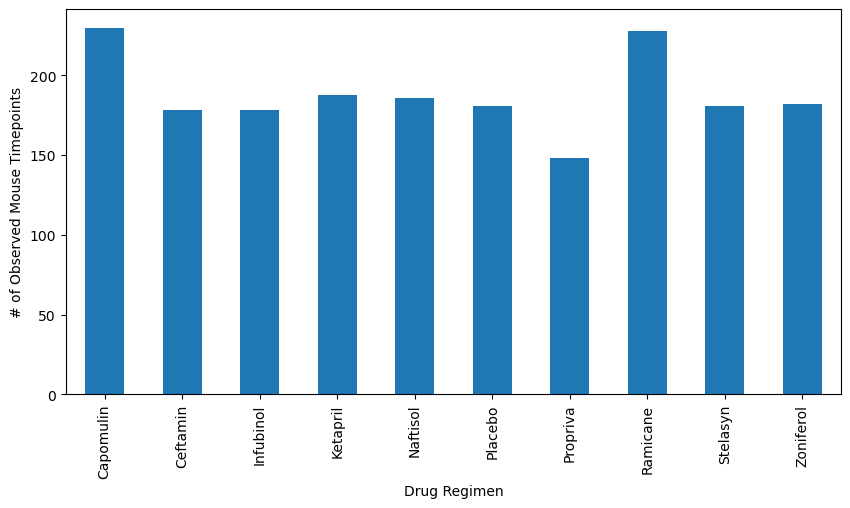

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_num_mouse = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID'].rename('Mice Count')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

bar_num_mouse.plot.bar(y='Number of Mice',figsize=(10,5))

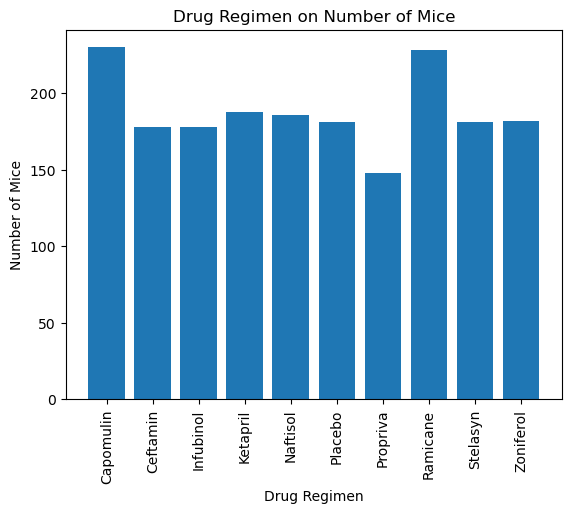

In [172]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_names = clean_mouse_data['Drug Regimen'].unique()

x_axis = sorted(drug_names)
y_axis = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']
tick_locations = x_axis



plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on Number of Mice')
plt.bar(x_axis, y_axis, align='center')
plt.xticks(tick_locations, rotation= 90)

plt.show()


Text(0.5, 1.0, 'Distribution of Female vs Male')

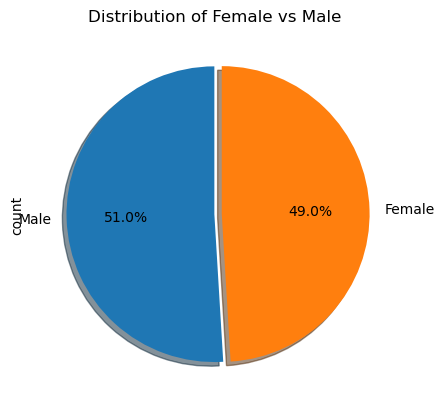

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_mouse_data["Sex"].value_counts()

gender_data.plot(kind="pie", autopct="%1.1f%%", startangle=90, shadow=True,explode=(0,0.05))
plt.title('Distribution of Female vs Male')

([<matplotlib.patches.Wedge at 0x13bced250>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

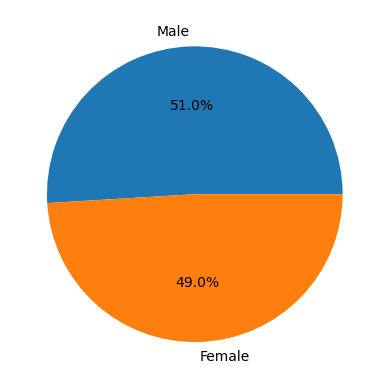

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male' , 'Female']
sizes = [958,922]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = greatest_timepoint_df.merge(clean_mouse_data,on=['Mouse ID','Timepoint'], how='left')
print(max_timepoint_df.head())

regimen_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for name in range(len(regimen_names)):
    temp = max_timepoint_df[max_timepoint_df['Drug Regimen'] == regimen_names[name]]

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [127]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    current_treatment = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == treatment,:]
    
    current_treatment_last = current_treatment.groupby('Mouse ID').max()['Timepoint']
    current_treatment_vol = pd.DataFrame(current_treatment_last)
    current_treatment_merge = pd.merge(current_treatment_vol, clean_mouse_data, on=("Mouse ID","Timepoint"),how="left")
    current_treatment_merge.head()
    
    current_treatment_tumors = current_treatment_merge["Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(current_treatment_tumors)
    
    quartiles =current_treatment_tumors.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{treatment}:")
    print(f"The interquartile range of temperatures in {treatment} is: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers in {treatment}.")
    print(f"Values above {upper_bound} could be outliers in {treatment}.\n")


Capomulin:
The interquartile range of temperatures in Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers in Capomulin.
Values above 51.83201549 could be outliers in Capomulin.

Ramicane:
The interquartile range of temperatures in Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers in Ramicane.
Values above 54.30681135 could be outliers in Ramicane.

Infubinol:
The interquartile range of temperatures in Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers in Infubinol.
Values above 82.74144559000001 could be outliers in Infubinol.

Ceftamin:
The interquartile range of temperatures in Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers in Ceftamin.
Values above 87.66645829999999 could be outliers in Ceftamin.



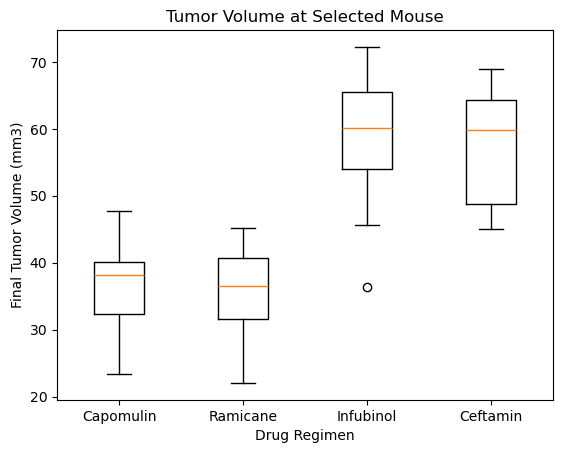

In [129]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels=treatments_list, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

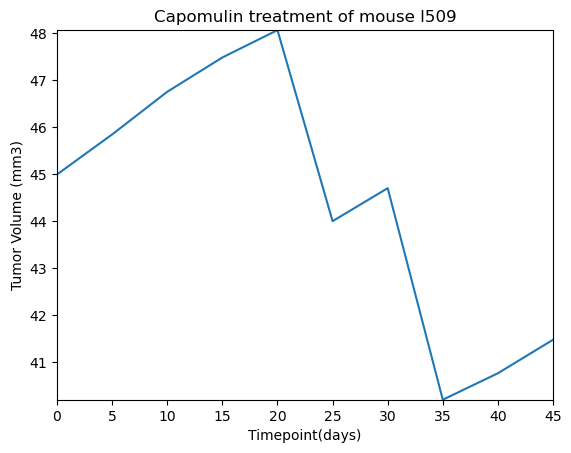

In [139]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_set = clean_mouse_data[clean_mouse_data['Drug Regimen']== 'Capomulin']

#mouse ID l509 from example graph
l509_mouse = capomulin_set.loc[capomulin_set['Mouse ID'] == 'l509']



plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0,45)
plt.ylim(l509_mouse['Tumor Volume (mm3)'].min(),l509_mouse['Tumor Volume (mm3)'].max())

plt.plot(l509_mouse['Timepoint'],l509_mouse['Tumor Volume (mm3)'])

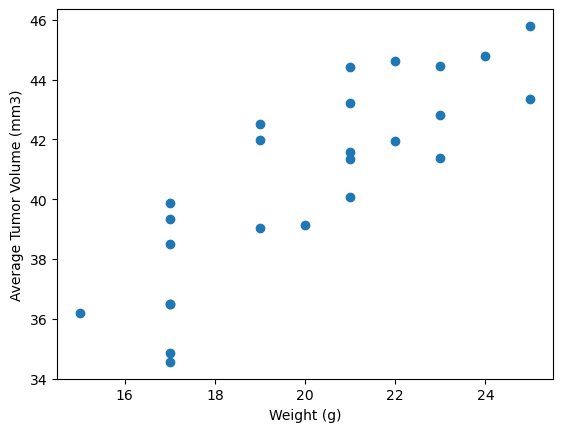

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


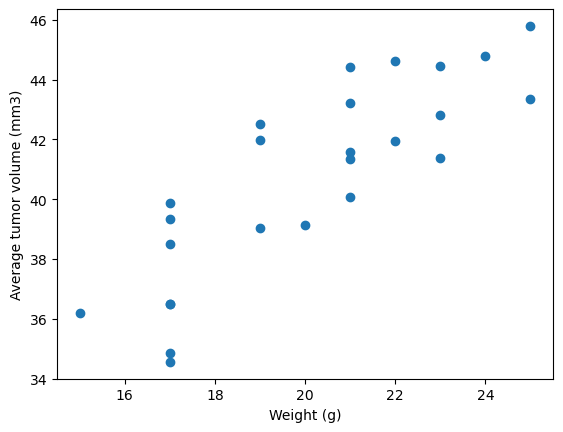

In [167]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capom_only=mousemerge_df[mousemerge_df['Drug Regimen']=='Capomulin']

avg_vol_df = pd.DataFrame(capom_only.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df=pd.merge(capom_only,avg_vol_df, on='Mouse ID')

avg_volfinal_df= avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

x=avg_volfinal_df['Weight (g)']
y=avg_volfinal_df['avg_tumor_vol']

plt.scatter(x,y)
plt.ylabel('Average tumor volume (mm3)')
plt.xlabel('Weight (g)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


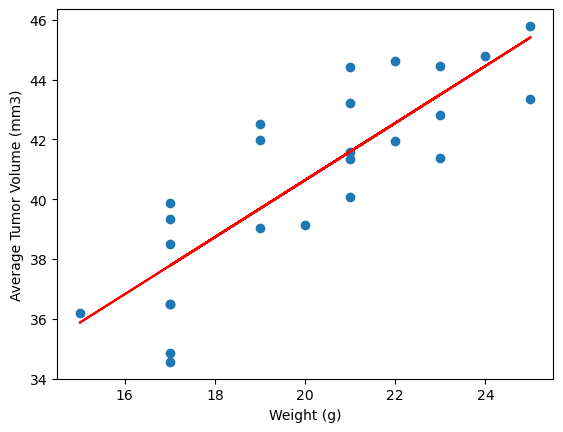

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [128]:

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(capomulin_avg.values,weight_capomulin.values)[0],2)}") 

# Linear Regression Model
# Perform a linear regression onmouse weight vs average tumor volume
ca_slope, ca_int, ca_r, ca_p, ca_std_err = st.linregress(weight_capomulin.values, capomulin_avg.values)

# Create equation of line to calculate predicted mouse weight
ca_fit = ca_slope * weight_capomulin.values + ca_int

# Plot the linear regression model on top of scatter plot
# Set the chart labels
plt.scatter(weight_capomulin.values,capomulin_avg.values)
plt.plot(weight_capomulin.values,ca_fit,'-')
plt.title('Average tumor volumes vs mouse weight for Capomulin')
plt.ylabel('Average tumor volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylim(capomulin_avg.values.min()-1,capomulin_avg.values.max()+1)
plt.xlim(weight_capomulin.values.min()-1,weight_capomulin.values.max()+1)

# Plot
plt.show()

AttributeError: 'DataFrameGroupBy' object has no attribute 'values'